# <span style="color:blue">Rayleigh-Benard Convection</span>

![alt text](images/Benard cells 3D.jpg)

Natural convection is a mechanism where motion is induced in a fluid, not 
through artificial means but by the effects of bouyancy. One of the most commonly studied convection phenomenon, is the Rayleigh-Benard convection. When a thin layer of fluid is heated from below, once the temperature difference, between the top and bottom fluid layers, grows large enough, convection cells, also called Benard cells, form within the fluid. As a result, some interesting patterns can be observed in the fluid.

![alt text](images/Bénard_cells_convection.ogv.jpg)

The cells are named after, Henri Benard, who conducted some of the earliest experiments on convection during the 1900s. Inspired by Benard's experiments, in 1916, Baron Rayleigh, John William Strutt, approached the problem his own way. Rayleigh was more interested in the stability aspect of Benard's problem. He showed that when the temperature gradient is high enough, instability would occur, leading to the formation of Benard cells. This behaviour is governed by the Rayleigh number. A non dimensional parameter of fluids, that relates the fluids rate of expansion due to heating, with the fluids viscosity. When this exceeds a certain critical value, the thermal energy within the fluid becomes strong enough to overcome the viscous forces, leading to the onset of convection.

$$Ra = \frac{\alpha \Delta Tgh^3}{\nu D }$$

Where,
                                $$\alpha =  thermal\  expansion\ coefficient\ $$                               
                                $$\nu = kinematic\ viscosity\$$
                                 $$D = thermal\ diffusivity\$$


                                
Experimental analysis has shown that the critical number is dependant on the boundary conditions of the problem. For example, for a case where a fluid is placed between and plate and open air, the critical value is less than if it were to be placed between to rigid plates. For this case, we will be studying the latter case. It is easier to keep the temperature of the colder surface constant and uniform with these conditions. 

## Problem Setup

For this case, we will be considering a layer of fluid placed between to rigid plates.

![alt text](images/Set-up.jpg)

The length of the fluid is assumed to be sufficiently larger than the height, so that it can be considered infinite. Benard's original experiments, used a height 1 mm and a length of 20 cm.(Benard cells and Taylor Vortices)

There are four boundary conditions. Two on each of the rigid plates. The temperatures at the plates are assumed to be constant and the no slip condition is applied.

$$T_{(x,t)}|_{y=0} = T_{o}$$
$$T_{(x,t)}|_{y=h} = T_{1}$$
$$u_{(x,t)}|_{y=0} = 0$$
$$u_{(x,t)}|_{y=h} = 0$$

For initial conditions, the fluid is at rest and the temperature is assumed to be linearly distributed.

$$T_{(x,t)}|_{t=0} = T_{o} + \frac{y}{h}(T_{1}-T{o})$$
$$u_{(x,t)}|_{t=0} = 0$$

## Governing Equations

The governing equations for this case, are derived by applying the Boussinesq approximation to the Navier-Stokes equations. The Boussinesq approximation neglects all density changes in the momentum and continuity equations, except for the gravity term. The assumption is, that the density changes are small compared to the velocity gradients. The gravitational constant is, however, strong enough to make it relevant.

$$\nabla \cdot u = 0$$
$$\frac{\partial u}{\partial t} + u\cdot \nabla u = -\frac{1}{\rho_{o}}\nabla p + \frac{\rho}{\rho_{o}}g + \nu\nabla^2u$$

Under the same assumption, the density can be shown to have a linear dependancy on the temperature.

$$\rho = \rho_{o}(1-\alpha(T-T_{o})$$

And finally, the thermal energy equation can be approximated to a relatively familiar form.

$$\frac{\partial T}{\partial t} + u\cdot \nabla T = D\nabla^2T$$

Where the thermal diffusivity, $$D = \frac{k}{\rho c}$$


Also, for this particular case, I will be modelling water. For temperatures between 0 and 370 degrees C, the viscosity of water can be found using the following relationship.

$$\nu = \frac{1}{rho}x2.414x10^{-5}x10^{\frac{247.8}{T-140}}$$

## Discretization

For this problem, I have decided to apply a forward-time central-space discretization scheme. As the boundary conditions for the pressure, depend on the fluid velocity, which is in turn dependant on the pressure, they are difficult to uncouple. One way to decouple the pressure and velocity terms, is by using Chorin's projection method. This is a two step process, not unlike the MacCormack method.

An intermediate velocity term is first calcualted, free of the pressure gradient. 

$$\frac{\partial u}{\partial t} + u\cdot \nabla u = \frac{\rho}{\rho_{o}}g + \nu\nabla^2u$$

This is then used to calculate the pressure gradient for the next time step, which calcualates the next iteration of the velocity field. To find the intermediate velocity, 'u_star', we discretize the above equation using forward-time central space scheme.

$$u_{i,j}^{*} = u_{I,j}^{n} + dt(- \frac{u_{i,j}^{n}}{2\delta}(u_{i+1,j}^{n} - u_{i-1,j}^{n} + u_{i,j+1}^{n} - u_{i,j-1}^{n}) + \frac{\nu_{i,j}}{\delta^2}(u_{i+1,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n} - 4u_{i,j}^{n}))$$

Where,
$$\delta = dx = dy$$

On taking the divergence of the momentum equation and using the continuity equation, we end up with a Poisson's equation, relating the pressure with u_star.

$$-\nabla^2 p = -\frac{\rho_{o}}{dt}\nabla \cdot u^{*}$$

In discretized form,

$$p_{i,j}^{n+1} = \frac{1}{4}(p_{i+1,j}^{n} + p_{i-1,j}^{n} + p_{i,j+1}^{n} + p_{i,j-1}^{n} - \frac{\rho_{o}}{dt}\delta u_{i,j}^{*})$$

This equation can be solved using the iterative method learned in module 5. Once the pressure distribution is found, we are finally ready to calculate the actual velocity and the temperature for the next time step.

$$u_{i,j}^{n+1} = u_{i,j}^{n} + dt(-\frac{u_{i,j}^{n}}{2\delta}(u_{i+1,j}^{n} - u_{i-1,j}^{n} + u_{i,j+1}^{n} - u_{i,j-1}^{n}) - \frac{1}{2\rho_{o}\delta}(p_{i+1,j}^{n} - p_{i-1,j}^{n} + p_{i,j+1}^{n} - p_{i,j-1}^{n}) + \frac{\nu_{i,j}}{\delta^2}(u_{i+1,j}^{n} + u_{i-1,j}^{n} + u_{i,j+1}^{n} + u_{i,j-1}^{n} - 4u_{i,j}^{n})$$

$$T_{i,j}^{n+1} = T_{i,j}^{n} + dt(-\frac{u_{i,j}^{n}}{2\delta}(T_{i+1,j}^{n} - T_{i-1,j}^{n} + T_{i,j+1}^{n} - T_{i,j-1}^{n}) + \frac{k}{c\rho_{i,j}\delta^2}(T_{i+1,j}^{n} + T_{i-1,j}^{n} + T_{i,j+1}^{n} + T_{i,j-1}^{n} - 4T_{i,j}^{n})$$

## Numerical Simulation

We start by importing our usual libraries, with the addition of the laplace_helper provided for module 5.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from laplace_helper import L2_rel_error

### Setting up the problem.

In [52]:
##Domain setup
L = 1                                    #Domain Length
H = 0.001                                #Domain Height

nxy = 51                                 #Grid points for x and y
nt = 3000                                #Time steps

dxy = L/(nxy-1)                          #Grid spacing for x and y

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)


##Fluid Properties
alpha = 207*10**(-6)                     #Volume expansion coefficient of water @ 20 C
k = 0.6                                  #Thermal conductivity of water @ 20 C

ReC = 1708                               #Critical Rayleigh number for two rigid body boundary condition
g = 9.81
D = 1.43E-7                              #Thermal diffusivity of water
c = k/D
rho_i = 1000                             #Density of water @ 20 C




##Initial Parameters


To = 20                                                     #Temperature of colder surface
vo = 2.414*10**(-5) * 10**(247.8/(To + 273 - 140)) / rho_i  #kinematic viscosity of water at 20 C
delT = (ReC*vo*1.43*10**(-7))/(alpha*g*H**3)                #Critical temperature gradient
Th = 70                                                     #Temperature of hotter surface
T = np.ones((nxy, nxy))*(To + (H-ya)/H*(Th-To))             #Initial temperature distribution


rho = np.zeros((nxy,nxy), dtype=float)
rho = rho_i*(1-alpha*(T - To))                              #Density of fluid body


v = np.ones((nxy,nxy))*2.414*10**(-5) * 10**(247.8/(T + 273 - 140)) / rho  #kinematic viscosity of water

ya = np.ones((nxy,nxy))
for i in range(nxy):
    ya[:,i] = y

p = np.zeros((nxy,nxy), dtype=float)
p[:,:] = rho[:,:] * (H-ya[:,:]) * g                          #Hydrostatic ressure distribution

u = np.zeros((nxy,nxy), dtype=float)                         #Fluid velocity

print('delT =',delT, 'Tl =',To+delT)

delT = 120.92877677020469 Tl = 140.9287767702047


In [53]:
# stability
sigma = 0.00005
#dt = sigma*min(dxy,dxy)**2/D
dt = 0.001

print('dt =',dt)

dt = 0.001


In [54]:
print('dxy =', dxy)

dxy = 0.02


### Solving the Poisson Equation
The poisson equation solver from module 5, has been slightly modified to work for this problem.

In [55]:
def poisson_IG(p, nxy, dxy, x, y, rho_i, u, dt):
    '''Initialize the Poisson problem initial guess and other variables
    Parameters:
    ----------
    nxy : int
        number of mesh points in x and y
    X  : 2D array of floats
        X-position of mesh
    Y  : 2D array of floats
        Y-position of mesh
    
    Returns:
    -------
    p_i: 2D array of floats
        initial guess of p
    b  : 2D array of floats
        forcing function
    dx : float
        mesh size in x direction
    dy : float
        mesh size in y direction
    '''


    # Mesh
    X,Y = np.meshgrid(x,y)

    # Intermidiate velocity
    b = (rho_i/dt) * (u[2:,1:-1] - u[:-2,1:-1] + u[1:-1,2:] - u[1:-1,:-2])

    # Initialize
    p_i  = p.copy()

    return X, Y, p_i, b


In [56]:
def poisson_2d(p, b, dxy, l2_target):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dxy: float
        Mesh spacing in x and y direction
    l2_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''

    l2_norm = 1
    iterations = 0
    l2_conv = []
    
    while l2_norm > l2_target:

        pd = p.copy()

        p[1:-1,1:-1] = 1/4*\
                        ((pd[1:-1,2:]+pd[1:-1,:-2]) +\
                        (pd[2:,1:-1] + pd[:-2,1:-1]) -\
                         b*dxy)
    
        # BCs are automatically enforced
        
        l2_norm = L2_rel_error(pd,p)
        iterations += 1
        l2_conv.append(l2_norm)
    
    return p

### Numerical Scheme

Creating the function to solve the forward-time backwards space scheme

In [57]:
def ftcs(T, To, Th, u, p, rho, rho_i, alpha, v, k, c, g, ya, H, delT, nt, dt, dxy, nxy, x, y):
    
    for n in range(nt):

        un = u.copy()
        u_star = un.copy()
        Tn = T.copy()
        pn = p.copy()
        vn = v.copy()
        
        #Calculating an intermediate velocity
        u_star[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-u[1:-1,1:-1]/(2*dxy) * (u[2:,1:-1] - u[:-2,1:-1] + u[1:-1,2:] - un[1:-1,:-2])\
                            + v[1:-1,1:-1]/(dxy**2) * (un[2:,1:-1] + un[:-2,1:-1] + un[1:-1,2:] + un[1:-1,:-2] - 4*un[1:-1,1:-1])\
                                                 + rho[1:-1,1:-1]/rho_i * g)
        u_star[-1,:] = 0        #Top Boundary
        u_star[0,:] = 0         #Bottom Boundary
        
        #Solving the poisson equation
        X, Y, ps, b = poisson_IG(p, nxy, dxy, x, y, rho_i, u_star, dt)
        p = poisson_2d(ps, b, dxy, 2e-4)
        
        #Actual velocity for next time step
        u[1:-1,1:-1] = u_star[1:-1,1:-1] - dt/(2*dxy)*(p[2:,1:-1] - p[:-2,1:-1] + p[1:-1,2:] - p[1:-1,:-2])
        
        u[-1,:] = 0             #Top Boundary
        u[0,:] = 0              #Bottom Boundary
        
        T[1:-1,1:-1] = T[1:-1,1:-1] + dt*(-u[1:-1,1:-1]/(2*dxy) * (T[2:,1:-1]-T[:-2,1:-1]+T[1:-1,2:]-T[1:-1,:-2])\
                                         + k/(rho[1:-1,1:-1]*c*dxy**2) * (T[2:,1:-1] + T[:-2,1:-1] + T[1:-1,2:] + T[1:-1,:-2]\
                                                                         -4*T[1:-1,1:-1]))
    
        T[0,:] = Th             #Bottom Boundary
        T[-1,:] = To            #top Boundary
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - To))
        
        v[1:-1,1:-1] = 2.414*10**(-5) * 10**(247.8/(T[1:-1,1:-1] + 273 - 140)) / rho[1:-1,1:-1]
                                                
    return p, u, T

In [58]:
p, u, T = ftcs(T, To, Th, u, p, rho, rho_i, alpha, v, k, c, g, ya, H, delT, nt, dt, dxy, nxy, x, y)

C:\Users\amiya\Documents\GitHub\assignment-bank-2015\Amiya Project\laplace_helper.py:17: RuntimeWarning: overflow encountered in square
  return numpy.sqrt(numpy.sum((p - pn)**2)/numpy.sum(pn**2))
C:\Users\amiya\Documents\GitHub\assignment-bank-2015\Amiya Project\laplace_helper.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return numpy.sqrt(numpy.sum((p - pn)**2)/numpy.sum(pn**2))
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in subtract


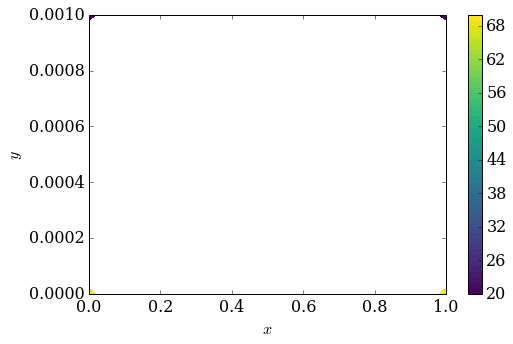

In [59]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,T,50,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();


## Conclusions

### References

[1] - Koschmieder, E. L. Bénard Cells and Taylor Vortices. Cambridge: Cambridge UP, 1993. Print. 
[2] - Sandberg, M., Berg, N. and Johnsson G. Rayleigh-Benard convection. Royal Institute of Technology, 2011
[3] Devendran, D. and Corona, E. Computational Fluid Dynamics Reading Group: Projection Methods
[4] Thermal instabilities: Benard convection